# Исследовательский анализ данных

## Импорт модулей

In [1]:
import pandas as pd

from comp_ds_prj.visualization import count_vals, review_data

%matplotlib inline

## Знакомство с данными

### Вывод общей информации о датафрейме

#### `car_train.csv`

Рассмотрим таблицу `car_train.csv`, содержащую описания машин и информацию о
поломках.

В данных
строк: 2337
столбцов: 10

Первые 10 строк таблицы:


,car_id,model,car_type,fuel_type,car_rating,year_to_start,riders,year_to_work,target_reg,target_class
0,y13744087j,Kia Rio X-line,economy,petrol,3.78,2015,76163,2021,108.53,another_bug
1,O41613818T,VW Polo VI,economy,petrol,3.90,2015,78218,2021,35.20,electro_bug
2,d-2109686j,Renault Sandero,standart,petrol,6.30,2012,23340,2017,38.62,gear_stick
3,u29695600e,Mercedes-Benz GLC,business,petrol,4.04,2011,1263,2020,30.34,engine_fuel
4,N-8915870N,Renault Sandero,standart,petrol,4.70,2012,26428,2017,30.45,engine_fuel
5,b12101843B,Skoda Rapid,economy,petrol,2.36,2013,42176,2018,50.93,engine_ignition
6,Q-9368117S,Nissan Qashqai,standart,petrol,5.32,2012,24611,2014,54.79,engine_overheat
7,O-2124190y,Tesla Model 3,premium,electro,3.90,2017,116872,2019,50.26,gear_stick
8,h16895544p,Kia Sportage,standart,petrol,3.50,2014,56384,2017,33.24,gear_stick
9,K77009462l,Smart ForFour,economy,petrol,4.56,2013,41309,2018,39.43,gear_stick



Общая информация о столбцах:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2337 entries, 0 to 2336
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   car_id         2337 non-null   object 
 1   model          2337 non-null   object 
 2   car_type       2337 non-null   object 
 3   fuel_type      2337 non-null   object 
 4   car_rating     2337 non-null   float64
 5   year_to_start  2337 non-null   int64  
 6   riders         2337 non-null   int64  
 7   year_to_work   2337 non-null   int64  
 8   target_reg     2337 non-null   float64
 9   target_class   2337 non-null   object 
dtypes: float64(2), int64(3), object(5)
memory usage: 182.7+ KB

Доля пропусков в каждом признаке:


car_id           0.0
model            0.0
car_type         0.0
fuel_type        0.0
car_rating       0.0
year_to_start    0.0
riders           0.0
year_to_work     0.0
target_reg       0.0
target_class     0.0
dtype: float64

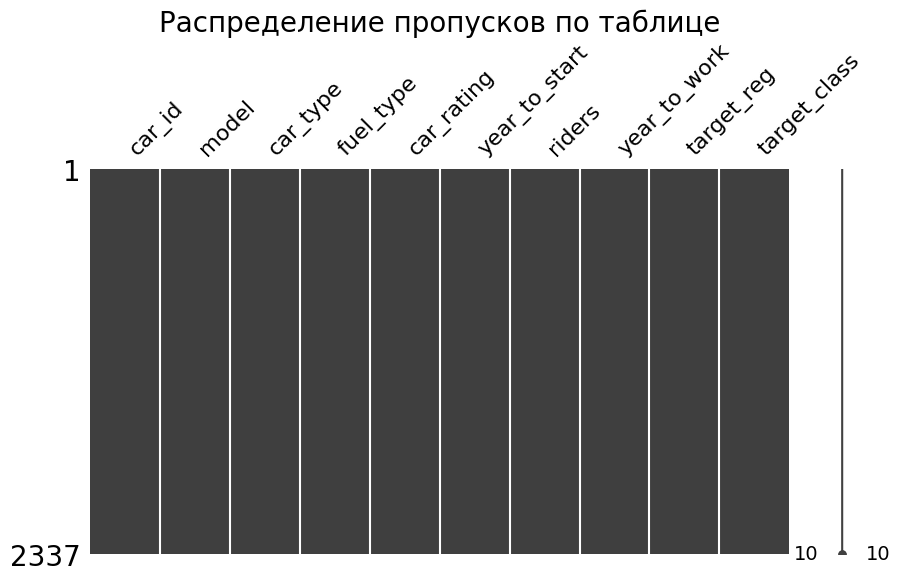

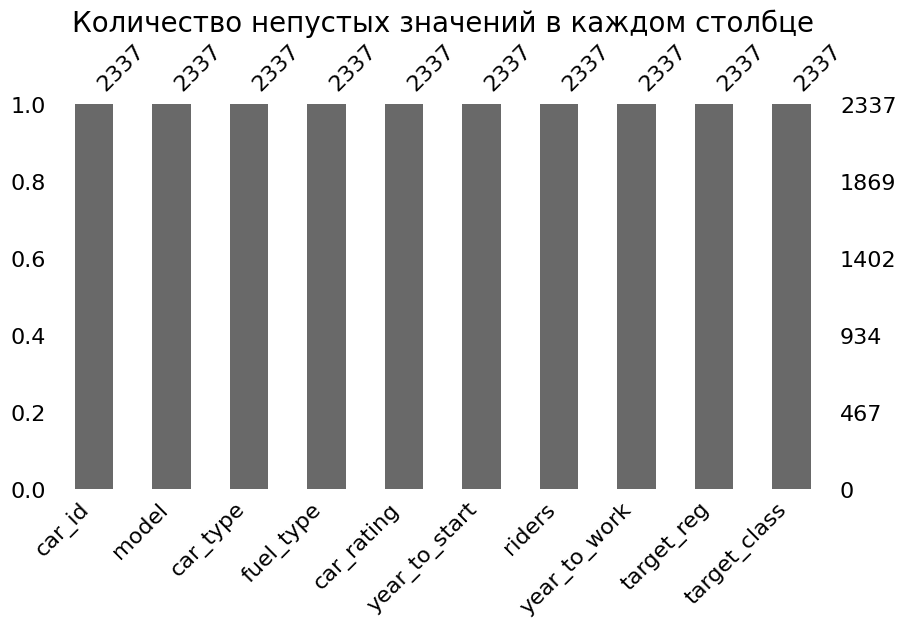

Описательные статистики для числовых признаков:


,count,mean,std,min,10%,25%,50%,75%,90%,max
car_rating,2337.0,4.354292,0.996954,0.98,3.072,3.74,4.36,5.00,5.600,8.90
year_to_start,2337.0,2014.040650,1.685852,2011.00,2012.000,2013.00,2014.00,2015.00,2016.400,2017.00
riders,2337.0,63711.443731,33755.012096,23.00,19583.600,41053.00,64415.00,86515.00,110536.200,142862.00
year_to_work,2337.0,2018.069748,2.159484,2014.00,2015.000,2016.00,2018.00,2020.00,2021.000,2022.00
target_reg,2337.0,44.946735,17.579568,18.92,26.966,31.67,40.17,54.79,67.068,141.63


Описательные статистики для категориальных признаков:


,count,unique,top,freq
car_id,2337,2337,y13744087j,1
model,2337,26,Hyundai Solaris,161
car_type,2337,4,economy,1536
fuel_type,2337,2,petrol,2289
target_class,2337,9,engine_overheat,289



Дубликаты не обнаружены.

Количество повторений значения признака year_to_start


,Значение признака year_to_start,Количество повторений
0,2015,604
1,2014,451
2,2013,433
3,2012,242
4,2017,234
5,2011,208
6,2016,165


Количество повторений значения признака year_to_work


,Значение признака year_to_work,Количество повторений
0,2019,346
1,2018,337
2,2020,336
3,2016,331
4,2017,320
5,2021,228
6,2015,215
7,2022,123
8,2014,101


In [2]:
car_train: pd.DataFrame = pd.read_csv(
    "./data/raw/car_train.csv"
)

review_data(car_train)
print()

count_vals(car_train, "year_to_start")

count_vals(car_train, "year_to_work")

**Выводы:**
1. Таблица не содержит пропусков.
2. Признак `car_id ` - **id автомобиля**, содержащий уникальное значение для
каждой записи.
3. Присутствует категориальный признак с высокой кардинальностью - `model`.
4. `target_reg` - целевой признак, содержащий количество дней до поломки, указан
с дробной частью. Поставлена задача регрессии.
5. `target_class` - целевой признак, содержащий 9 классов поломок, т.е.
поставлена кроме задачи регрессии поставлена задача многоклассовой
классификации.

#### `driver_info.csv`

Рассмотрим таблицу `driver_info.csv`, содержащую информацию о водителях.

В данных
строк: 15153
столбцов: 7

Первые 10 строк таблицы:


,age,user_rating,user_rides,user_time_accident,user_id,sex,first_ride_date
0,27,9.0,865,19.0,l17437965W,1,2019-4-2
1,46,7.9,2116,11.0,Z12362316j,0,2021-11-19
2,59,7.8,947,4.0,g11098715c,0,2021-1-15
3,37,7.0,18,4.0,U12618125q,0,2019-11-20
4,39,8.2,428,7.0,A14375829B,0,2019-7-23
5,21,9.9,831,22.0,L95976611S,1,2020-9-18
6,39,6.9,2293,5.0,z74338505G,0,2022-3-30
7,26,7.9,142,5.0,q11106749z,1,2019-12-22
8,18,9.3,425,18.0,r77865210A,1,2020-6-4
9,23,9.2,601,12.0,t10928335r,1,2020-7-18



Общая информация о столбцах:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15153 entries, 0 to 15152
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   age                 15153 non-null  int64  
 1   user_rating         15153 non-null  float64
 2   user_rides          15153 non-null  int64  
 3   user_time_accident  14182 non-null  float64
 4   user_id             15153 non-null  object 
 5   sex                 15153 non-null  int64  
 6   first_ride_date     15153 non-null  object 
dtypes: float64(2), int64(3), object(2)
memory usage: 828.8+ KB

Доля пропусков в каждом признаке:


age                   0.00
user_rating           0.00
user_rides            0.00
user_time_accident    0.06
user_id               0.00
sex                   0.00
first_ride_date       0.00
dtype: float64

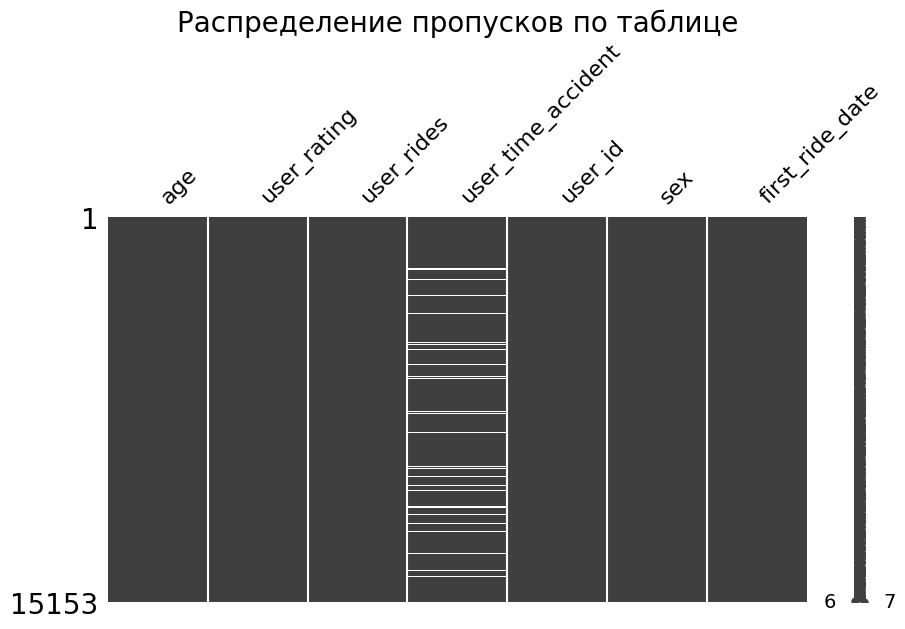

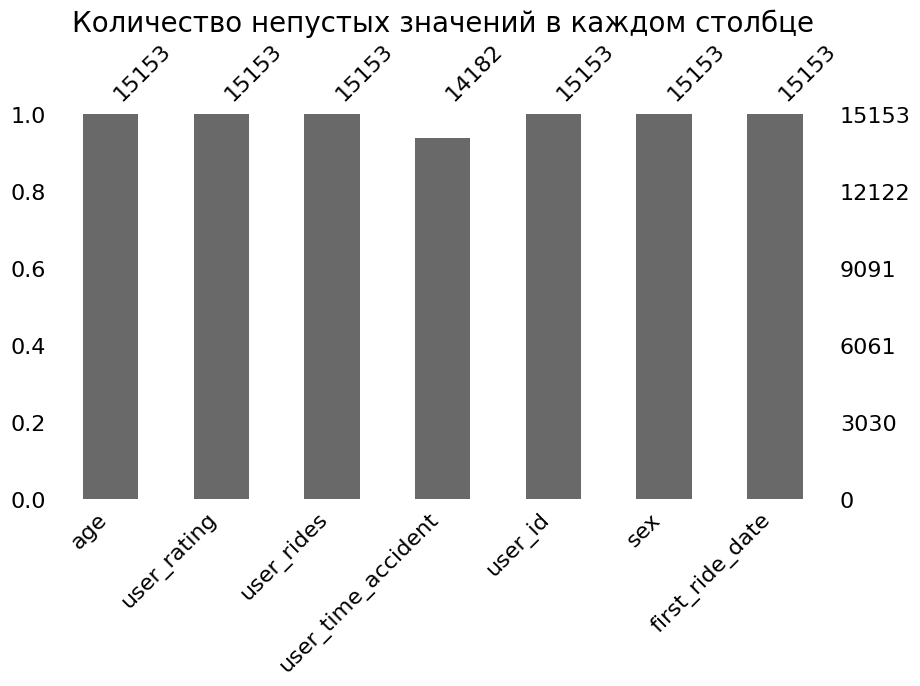

Описательные статистики для числовых признаков:


,count,mean,std,min,10%,25%,50%,75%,90%,max
age,15153.0,33.581073,9.919271,18.0,20.0,25.0,33.0,41.0,47.0,63.0
user_rating,15153.0,8.109345,0.668246,5.8,7.2,7.7,8.1,8.6,9.0,10.0
user_rides,15153.0,871.015442,573.512378,0.0,126.0,421.0,876.0,1145.0,1668.0,3316.0
user_time_accident,14182.0,10.129601,8.867482,0.0,1.0,4.0,9.0,14.0,19.0,86.0
sex,15153.0,0.499967,0.500016,0.0,0.0,0.0,0.0,1.0,1.0,1.0


Описательные статистики для категориальных признаков:


,count,unique,top,freq
user_id,15153,15153,l17437965W,1
first_ride_date,15153,1653,2019-1-30,43



Дубликаты не обнаружены.


In [3]:
driver_info: pd.DataFrame = pd.read_csv(
    "./data/raw/driver_info.csv"
)

review_data(driver_info)

**Выводы:**
1. Признак `user_time_accident` содержит около 6% пропущенных значений,
остальные признаки не содержат пропусков. При этом сам признак является
целочисленным, так как содержит количество инцидентов.
1. Признак `user_rating` количественный с плавающей точкой, округлённый до
десятых.
1. Признак `user_rides`, содержит значения равные 0, то есть в таблице
есть пользователи, не совершившие ни одной поездки.
1. Признак `user_id` - **id водителя** целиком состоит из уникальных значений.
1. Признак `Sex` категориальный, но распознан как целочисленный, так как целиком
закодирован нулями и единицами.
1. Для признака `first_ride_date` выведен тип `object`, в то время как он
содержит дату первой поездки каждого водителя и должен иметь тип `datetime`.

#### `fix_info.csv`

Рассмотрим таблицу `fix_info.csv`, содержащую информацию о ремонтах машин.

В данных
строк: 146000
столбцов: 6

Первые 10 строк таблицы:


,car_id,worker_id,fix_date,work_type,destroy_degree,work_duration
0,P17494612l,RJ,2020-6-20 2:14,reparking,8.0,49
1,N-1530212S,LM,2020-2-9 20:25,repair,10.0,48
2,B-1154399t,ND,2019-8-24 7:1,reparking,1.0,27
3,y13744087j,PG,2019-8-10 9:29,reparking,1.0,28
4,F12725233R,YC,2020-11-12 5:22,refuel_check,8.0,47
5,O41613818T,RW,2019-2-21 13:25,reparking,1.0,32
6,l-1139189J,PO,2020-3-2 19:11,reparking,1.0,28
7,d-2109686j,ML,2018-3-2 5:12,repair,7.4,39
8,u29695600e,QN,2020-2-2 20:10,reparking,10.0,64
9,U75286923j,KC,2019-9-2 6:32,reparking,1.0,24



Общая информация о столбцах:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146000 entries, 0 to 145999
Data columns (total 6 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   car_id          146000 non-null  object 
 1   worker_id       146000 non-null  object 
 2   fix_date        146000 non-null  object 
 3   work_type       146000 non-null  object 
 4   destroy_degree  146000 non-null  float64
 5   work_duration   146000 non-null  int64  
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB

Доля пропусков в каждом признаке:


car_id            0.0
worker_id         0.0
fix_date          0.0
work_type         0.0
destroy_degree    0.0
work_duration     0.0
dtype: float64

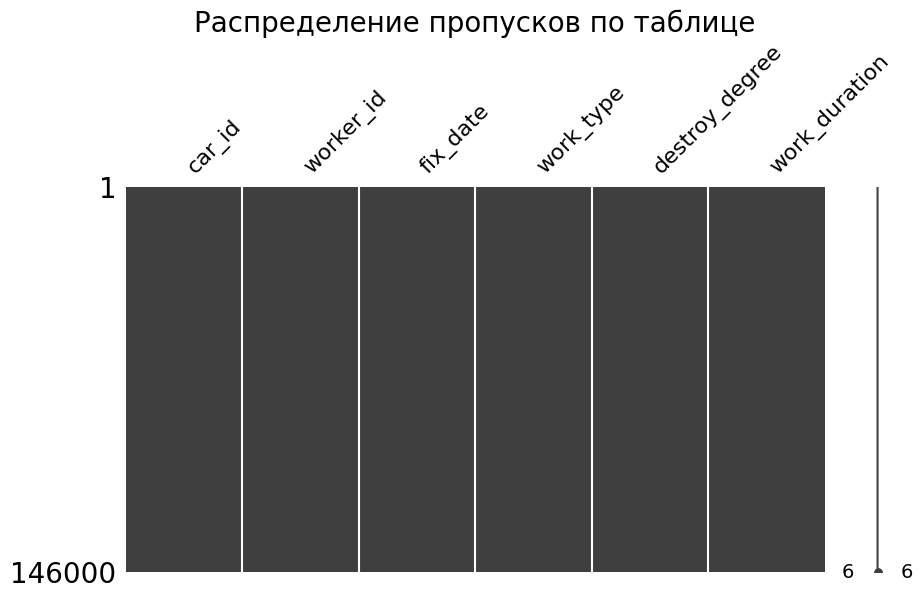

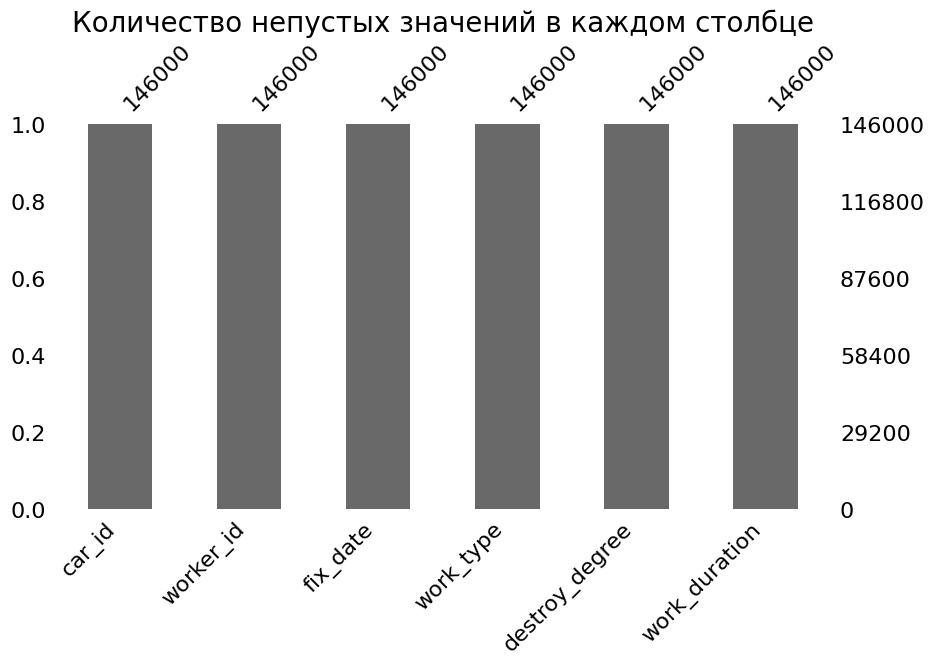

Описательные статистики для числовых признаков:


,count,mean,std,min,10%,25%,50%,75%,90%,max
destroy_degree,146000.0,3.510022,2.752983,1.0,1.0,1.0,3.2,5.5,7.1,10.0
work_duration,146000.0,26.144527,12.642266,1.0,11.0,20.0,26.0,31.0,40.0,74.0


Описательные статистики для категориальных признаков:


,count,unique,top,freq
car_id,146000,4250,P17494612l,35
worker_id,146000,546,CH,321
fix_date,146000,138311,2019-7-28 11:46,4
work_type,146000,6,repair,67733



Дубликаты не обнаружены.


In [4]:
fix_info: pd.DataFrame = pd.read_csv(
    "./data/raw/fix_info.csv"
)

review_data(fix_info)

**Выводы:**
1. Таблица не содержит пропусков.
1. Признак `car_id`, содержащий идентификатор автомобиля, содержит повторяющиеся
значения, что логично, так как одна и та же машина могла быть в ремонте
несколько раз.
1. Признак `worker_id` категориальный с высокой кардинальностью.
1. Для признака `fix_date`, содержащего дату и время начала ремонта, выведен тип
`object`, в то время как должен был быть `datetime`
1. Количественный признак `destroy_degree`, вероятно округлён до десятых.
1. Признак `work_duration` дискретный количественный признак, округлённый до
целых.

#### `rides_info.csv`

Рассмотрим таблицу `rides_info.csv`, содержащую информацию о поездках.

В данных
строк: 739500
столбцов: 14

Первые 10 строк таблицы:


,user_id,car_id,ride_id,ride_date,rating,ride_duration,ride_cost,speed_avg,speed_max,stop_times,distance,refueling,user_ride_quality,deviation_normal
0,o52317055h,A-1049127W,b1v,2020-01-01,4.95,21,268,36,113.548538,0,514.246920,0,1.115260,2.909
1,H41298704y,A-1049127W,T1U,2020-01-01,6.91,8,59,36,93.000000,1,197.520662,0,1.650465,4.133
2,v88009926E,A-1049127W,g1p,2020-01-02,6.01,20,315,61,81.959675,0,1276.328206,0,2.599112,2.461
3,t14229455i,A-1049127W,S1c,2020-01-02,0.26,19,205,32,128.000000,0,535.680831,0,3.216255,0.909
4,W17067612E,A-1049127W,X1b,2020-01-03,1.21,56,554,38,90.000000,1,1729.143367,0,2.716550,-1.822
5,I45176130J,A-1049127W,j1v,2020-01-03,7.52,67,1068,28,36.000000,2,363.209144,0,0.496265,-3.442
6,W11562554A,A-1049127W,A1g,2020-01-04,5.78,30,324,48,61.000000,0,1314.257355,0,1.464346,-6.004
7,o13713369s,A-1049127W,B1n,2020-01-04,7.35,29,401,57,65.845512,0,1753.888420,0,0.497193,-6.474
8,y62286141d,A-1049127W,h1a,2020-01-05,0.12,64,893,38,114.000000,1,2022.125012,0,-0.155147,-5.123
9,V28486769l,A-1049127W,p1e,2020-01-05,3.32,43,424,31,51.298365,1,1334.567248,0,-3.757628,-2.079



Общая информация о столбцах:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 739500 entries, 0 to 739499
Data columns (total 14 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   user_id            739500 non-null  object 
 1   car_id             739500 non-null  object 
 2   ride_id            739500 non-null  object 
 3   ride_date          739500 non-null  object 
 4   rating             739500 non-null  float64
 5   ride_duration      739500 non-null  int64  
 6   ride_cost          739500 non-null  int64  
 7   speed_avg          739500 non-null  int64  
 8   speed_max          736139 non-null  float64
 9   stop_times         739500 non-null  int64  
 10  distance           739500 non-null  float64
 11  refueling          739500 non-null  int64  
 12  user_ride_quality  736872 non-null  float64
 13  deviation_normal   739500 non-null  float64
dtypes: float64(5), int64(5), object(4)
memory usage: 79.0+ MB

Доля пропус

user_id              0.0
car_id               0.0
ride_id              0.0
ride_date            0.0
rating               0.0
ride_duration        0.0
ride_cost            0.0
speed_avg            0.0
speed_max            0.0
stop_times           0.0
distance             0.0
refueling            0.0
user_ride_quality    0.0
deviation_normal     0.0
dtype: float64

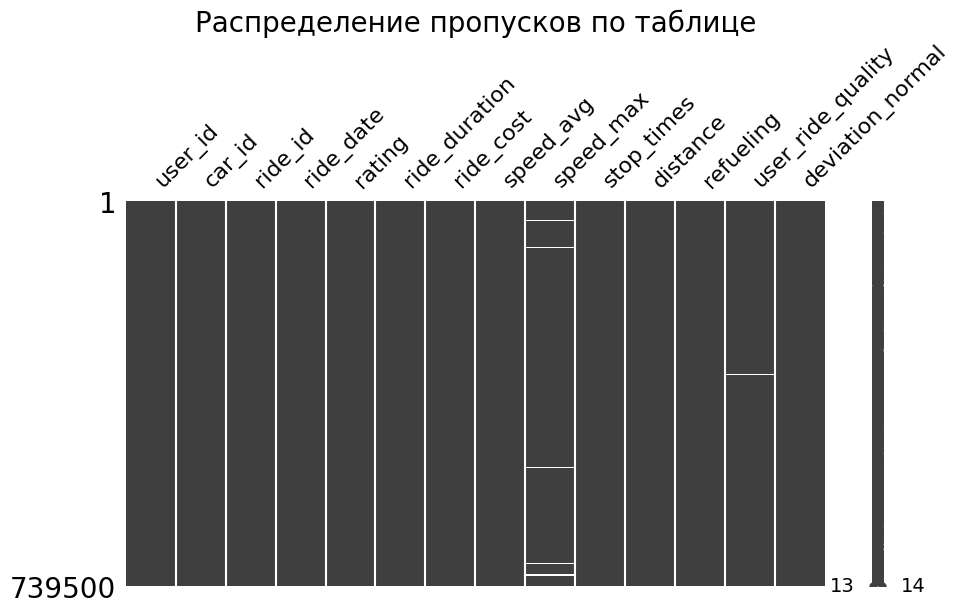

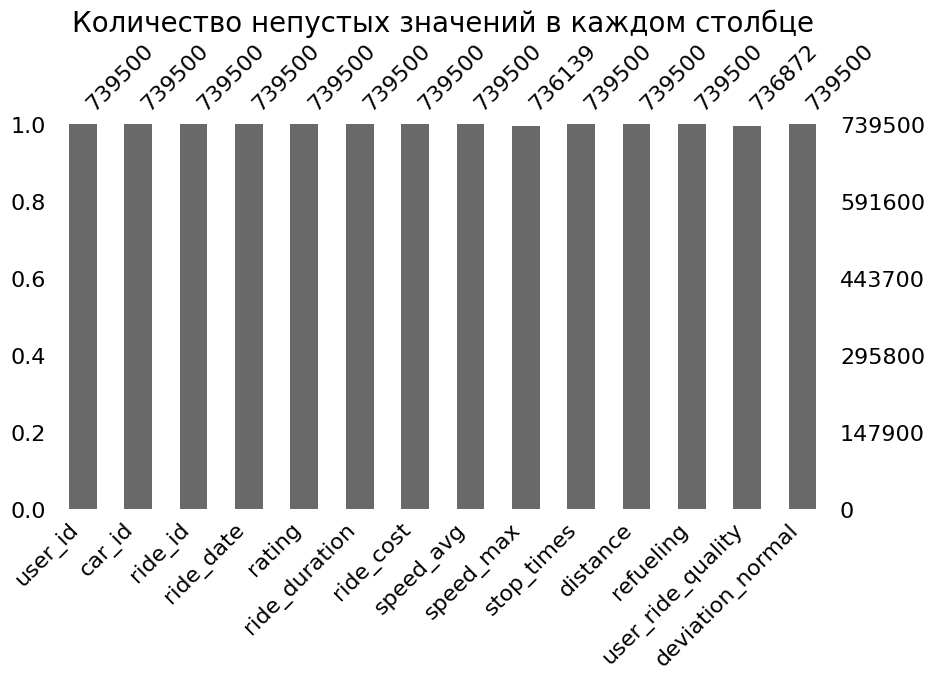

Описательные статистики для числовых признаков:


,count,mean,std,min,10%,25%,50%,75%,90%,max
rating,739500.0,4.471255,2.130867,0.000000,1.560000,3.120000,4.470000,5.830000,7.320000,1.000000e+01
ride_duration,739500.0,1669.619079,6356.635586,2.000000,15.000000,27.000000,44.000000,69.000000,360.000000,4.395600e+04
ride_cost,739500.0,20931.084680,87315.374903,7.000000,159.000000,298.000000,505.000000,888.000000,4426.100000,2.007346e+06
speed_avg,739500.0,47.012270,12.690333,25.000000,33.000000,38.000000,46.000000,52.000000,65.000000,1.000000e+02
speed_max,736139.0,83.787431,29.642707,27.900000,54.000000,64.000000,75.275957,97.000000,130.777235,2.099828e+02
stop_times,739500.0,1.337385,2.369775,0.000000,0.000000,0.000000,1.000000,2.000000,2.000000,2.300000e+01
distance,739500.0,78395.668135,315814.741969,1.843634,362.096635,792.595163,1452.544163,2247.795216,4090.619931,3.606051e+06
refueling,739500.0,0.000004,0.002014,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000e+00
user_ride_quality,736872.0,-0.273648,11.657122,-65.776864,-14.893420,-6.975054,0.074098,6.461507,13.779151,6.957465e+01
deviation_normal,739500.0,-1.341434,19.581792,-126.883000,-24.062100,-9.358000,0.000000,7.539250,21.543000,9.874300e+01


Описательные статистики для категориальных признаков:


,count,unique,top,freq
user_id,739500,15153,n50223955s,153
car_id,739500,4250,A-1049127W,174
ride_id,739500,2704,k1y,330
ride_date,739500,93,2020-01-01,8039



Дубликаты не обнаружены.


In [5]:
rides_info: pd.DataFrame = pd.read_csv(
    "./data/raw/rides_info.csv"
)

review_data(rides_info)

**Выводы:**
1. Таблица содержит небольшое количество пропусков в признаках `speed_max` и
`user_ride_quality` - менее 1% в каждом.
1. Признаки `user_id`, `car_id` и `ride_id` содержат индентификаторы
пользователя, автомобиля и поездки, соответственно. `user_id` и `car_id`
закономерно содержат повторяющиеся значения, в то время как повторяющиеся
значения в `ride_id` выглядят странно.
1. Для признака `ride_date` выведен тип `object`. Подходящим типом является
`date_time`, так как признак содержит дату поездки.
1. Количественный признак `rating` округлён до сотых.
1. Количественные признаки `ride_duration`, `ride_cost`, `speed_avg` округлены
до целых.
1. Признак `refueling` категориальный (флаг, была ли дозаправка), но распознан
как целочисленный, так как полностью закодирован нулями и единицами.

#### `car_test.csv`

Рассмотрим таблицу `car_test.csv`, содержащую данные для подготовки прогноза для
соревнования.

В данных
строк: 1913
столбцов: 8

Первые 10 строк таблицы:


,car_id,model,car_type,fuel_type,car_rating,year_to_start,riders,year_to_work
0,P17494612l,Skoda Rapid,economy,petrol,4.80,2013,42269,2019
1,N-1530212S,Renault Sandero,standart,petrol,4.32,2015,90014,2016
2,B-1154399t,Smart ForTwo,economy,petrol,4.46,2015,82684,2017
3,F12725233R,Smart ForFour,economy,petrol,2.80,2014,68833,2021
4,l-1139189J,Skoda Rapid,economy,petrol,6.56,2013,42442,2021
5,U75286923j,Nissan Qashqai,standart,petrol,4.04,2014,59752,2018
6,T-7479831o,Renault Sandero,standart,petrol,4.38,2015,84497,2015
7,B-1369793u,Kia Rio X,economy,petrol,4.98,2015,73543,2022
8,Y-1289786X,Renault Kaptur,standart,petrol,3.50,2011,2670,2015
9,C29045893T,Kia Sportage,standart,petrol,4.34,2013,42630,2014



Общая информация о столбцах:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1913 entries, 0 to 1912
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   car_id         1913 non-null   object 
 1   model          1913 non-null   object 
 2   car_type       1913 non-null   object 
 3   fuel_type      1913 non-null   object 
 4   car_rating     1913 non-null   float64
 5   year_to_start  1913 non-null   int64  
 6   riders         1913 non-null   int64  
 7   year_to_work   1913 non-null   int64  
dtypes: float64(1), int64(3), object(4)
memory usage: 119.7+ KB

Доля пропусков в каждом признаке:


car_id           0.0
model            0.0
car_type         0.0
fuel_type        0.0
car_rating       0.0
year_to_start    0.0
riders           0.0
year_to_work     0.0
dtype: float64

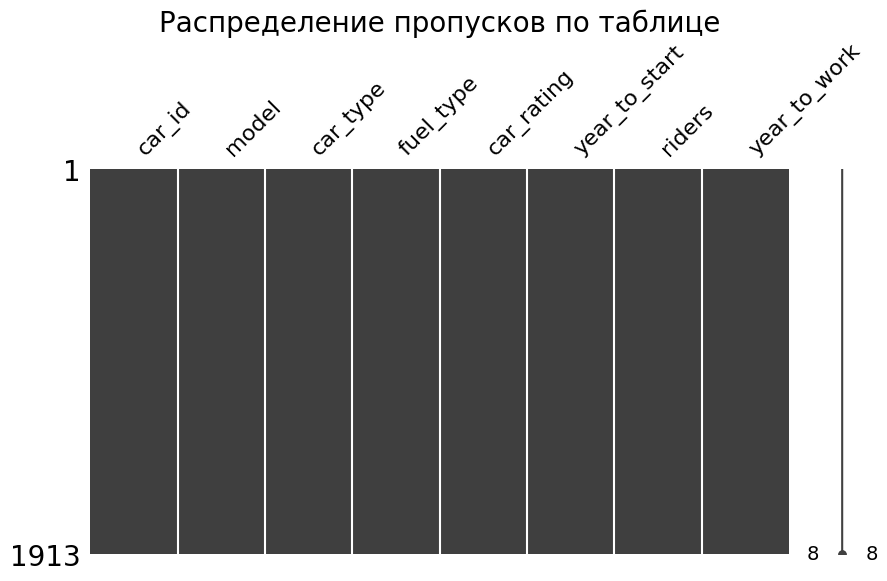

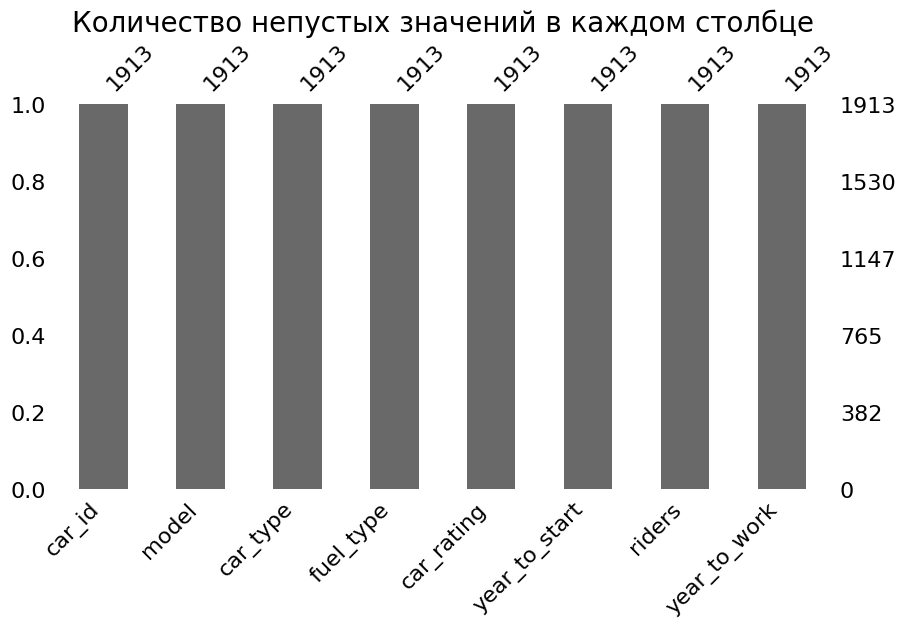

Описательные статистики для числовых признаков:


,count,mean,std,min,10%,25%,50%,75%,90%,max
car_rating,1913.0,4.314375,0.932978,1.3,3.14,3.72,4.34,4.92,5.456,7.7
year_to_start,1913.0,2014.013068,1.699845,2011.0,2012.00,2013.00,2014.00,2015.00,2016.000,2017.0
riders,1913.0,62940.530058,34074.943084,4.0,18782.80,40050.00,64957.00,85786.00,109499.400,143313.0
year_to_work,1913.0,2018.290643,2.154882,2014.0,2015.00,2017.00,2018.00,2020.00,2021.000,2022.0


Описательные статистики для категориальных признаков:


,count,unique,top,freq
car_id,1913,1913,P17494612l,1
model,1913,26,Renault Sandero,146
car_type,1913,4,economy,1260
fuel_type,1913,2,petrol,1875



Дубликаты не обнаружены.


In [6]:
car_test: pd.DataFrame = pd.read_csv(
    "./data/raw/car_test.csv"
)

review_data(car_test)

**Выводы:**
1. Таблица не содержит пропусков.
1. Таблица содержит те же признаки, что  и car_train.csv, кроме целевых
признаков `target_reg` и `target_class`.
1. Количество строк `car_test.csv` приблизительно равно количеству строк
`car_train.csv` (примерно 82%).